# Web Scraping

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from time import sleep
from random import randint

movie_name = []
year = []
time=[]
rating=[]
metascore =[]
votes = []
gross = []
description = []

pages = np.arange(1,1000,100)

for page in pages:
    page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start="+str(page)+"&ref_=adv_nxt")
    soup = BeautifulSoup(page.text, 'html.parser')
    movie_data = soup.findAll('div', attrs = {'class': 'lister-item mode-advanced'})
    sleep(randint(2,8))
    
    for store in movie_data:
        name = store.h3.a.text
        movie_name.append(name)
        
        year_of_release = store.h3.find('span', class_ = "lister-item-year text-muted unbold").text
        year.append(year_of_release)
        
        runtime = store.p.find("span", class_ = 'runtime').text
        time.append(runtime)
        
        rate = store.find('div', class_ = "inline-block ratings-imdb-rating").text.replace('\n', '')
        rating.append(rate)
        
        meta = store.find('span', class_ = "metascore").text if store.find('span', class_ = "metascore") else "NaN"
        metascore.append(meta)
        
        value = store.find_all('span', attrs = {'name': "nv"})
        
        vote = value[0].text
        votes.append(vote)
        
        grosses = value[1].text if len(value)>1 else "NaN"
        gross.append(grosses)
         
        describe = store.find_all('p', class_ = 'text-muted')
        description_ = describe[1].text.replace('\n', '') if len(describe) >1 else "NaN"
        description.append(description_)
        
df = pd.DataFrame({ "Movie Name": movie_name, "Year of Release" : year, "Watch Time": time,"Rating": rating, "Metascore": metascore, "Votes":votes, "Gross":gross})

In [2]:
df.to_csv("movies.csv")

# Import Data 

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('movies.csv')

In [5]:
df

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Rating,Metascore,Votes,Gross
0,0,Jai Bhim,(2021),164 min,9.4,NaN,"156,326",NaN
1,1,The Shawshank Redemption,(1994),142 min,9.3,80.0,"2,504,064",$28.34M
2,2,The Godfather,(1972),175 min,9.2,100.0,"1,726,078",$134.97M
3,3,Soorarai Pottru,(2020),153 min,9.1,NaN,"104,398",NaN
4,4,The Dark Knight,(2008),152 min,9.0,84.0,"2,453,590",$534.86M
...,...,...,...,...,...,...,...,...
995,995,Sabrina,(1954),113 min,7.6,72.0,"62,750",NaN
996,996,From Here to Eternity,(1953),118 min,7.6,85.0,"45,655",$30.50M
997,997,Gilda,(1946),110 min,7.6,NaN,"31,227",NaN
998,998,Lifeboat,(1944),97 min,7.6,78.0,"28,067",NaN


In [6]:
df.shape

(1000, 8)

# Pre-Processing

In [7]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

Work with null values

In [8]:
df.isnull().sum()

Movie Name           0
Year of Release      0
Watch Time           0
Rating               0
Metascore          169
Votes                0
Gross              185
dtype: int64

In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
df.isnull().sum()

Movie Name         0
Year of Release    0
Watch Time         0
Rating             0
Metascore          0
Votes              0
Gross              0
dtype: int64

In [11]:
df.shape

(731, 7)

work with columns

In [12]:
#change Year of Release column
df['Year of Release'].unique()

array(['(1994)', '(1972)', '(2008)', '(1974)', '(1957)', '(2003)',
       '(1993)', '(2010)', '(1999)', '(2001)', '(1966)', '(2002)',
       '(1990)', '(1980)', '(1975)', '(2019)', '(2014)', '(1998)',
       '(1997)', '(1995)', '(1991)', '(1977)', '(1954)', '(2011)',
       '(2006)', '(2000)', '(1988)', '(1985)', '(1968)', '(1960)',
       '(1942)', '(1936)', '(1931)', '(2018)', '(2016)', '(I) (2017)',
       '(2012)', '(2009)', '(1981)', '(1979)', '(1964)', '(2004)',
       '(1992)', '(1987)', '(1986)', '(1984)', '(1983)', '(1973)',
       '(1971)', '(1962)', '(1959)', '(1958)', '(1952)', '(1944)',
       '(1941)', '(1927)', '(2013)', '(2020)', '(2007)', '(2005)',
       '(1989)', '(1976)', '(1969)', '(1965)', '(1963)', '(1950)',
       '(1948)', '(2017)', '(I) (2014)', '(I) (2015)', '(I) (2013)',
       '(2015)', '(1996)', '(1982)', '(1978)', '(1967)', '(1955)',
       '(1951)', '(1949)', '(1946)', '(1940)', '(1939)', '(1934)',
       '(1930)', '(I) (2004)', '(1970)', '(1961)', '(192

In [13]:
def func(x):
    if len(x) == 6:
        return x[1:-1]
    elif len(x) == 0:
        return '2000'
    else:
        return x[-5:-1]

In [14]:
df['Year of Release'] = df['Year of Release'].apply(func)

In [15]:
#change Watch Time column
df['Watch Time'].unique()

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '132 min',
       '169 min', '130 min', '125 min', '189 min', '116 min', '127 min',
       '118 min', '121 min', '207 min', '106 min', '112 min', '151 min',
       '150 min', '155 min', '119 min', '110 min', '88 min', '137 min',
       '165 min', '109 min', '102 min', '87 min', '126 min', '122 min',
       '117 min', '181 min', '149 min', '105 min', '164 min', '170 min',
       '98 min', '120 min', '113 min', '134 min', '115 min', '147 min',
       '95 min', '123 min', '131 min', '153 min', '108 min', '104 min',
       '89 min', '81 min', '99 min', '229 min', '160 min', '129 min',
       '228 min', '128 min', '103 min', '107 min', '138 min', '180 min',
       '158 min', '140 min', '156 min', '135 min', '86 min', '162 min',
       '114 min', '91 min', '172 min', '145 min', '196 min',

In [16]:
df['Watch Time'] = df['Watch Time'].apply(lambda x: x[0:3])

In [17]:
#change with Votes column
df['Votes'].unique()

array(['2,504,064', '1,726,078', '2,453,590', '1,197,713', '739,571',
       '1,729,859', '1,932,192', '1,281,314', '2,201,821', '1,969,920',
       '1,751,154', '1,932,858', '725,415', '1,563,724', '1,787,585',
       '1,084,242', '1,218,343', '963,208', '690,708', '1,652,221',
       '727,957', '705,371', '1,308,669', '1,218,950', '659,883',
       '1,538,196', '1,348,745', '1,290,059', '332,188', '776,808',
       '807,355', '1,260,459', '1,254,776', '781,256', '1,416,707',
       '1,076,229', '1,038,643', '1,095,928', '995,405', '1,044,114',
       '248,370', '1,127,515', '317,285', '638,621', '470,514', '548,074',
       '231,270', '177,822', '78,693', '1,107,016', '232,639', '443,250',
       '971,388', '949,239', '445,214', '1,448,474', '1,596,791',
       '373,077', '1,054,401', '376,142', '548,093', '1,180,720',
       '370,072', '925,280', '958,088', '636,902', '833,615', '471,542',
       '512,421', '308,702', '234,336', '166,021', '1,352,045', '958,040',
       '730,543', '

In [18]:
df['Votes'] = df['Votes'].apply(lambda x: int(x.replace(',','')))

In [19]:
#change Gross column
df['Gross'].unique()

array(['$28.34M', '$134.97M', '$534.86M', '$57.30M', '$4.36M', '$377.85M',
       '$107.93M', '$96.90M', '$292.58M', '$37.03M', '$315.54M',
       '$330.25M', '$6.10M', '$342.55M', '$171.48M', '$46.84M',
       '$290.48M', '$112.00M', '$53.37M', '$188.02M', '$7.56M', '$10.06M',
       '$216.54M', '$136.80M', '$57.60M', '$100.13M', '$130.74M',
       '$322.74M', '$0.27M', '$13.09M', '$13.18M', '$53.09M', '$132.38M',
       '$32.57M', '$187.71M', '$6.72M', '$23.34M', '$19.50M', '$422.78M',
       '$204.84M', '$11.99M', '$210.61M', '$5.32M', '$32.00M', '$36.76M',
       '$1.02M', '$0.16M', '$0.02M', '$1.66M', '$335.45M', '$5.02M',
       '$190.24M', '$858.37M', '$678.82M', '$209.73M', '$162.81M',
       '$448.14M', '$6.53M', '$223.81M', '$11.29M', '$0.71M', '$25.54M',
       '$2.38M', '$248.16M', '$44.02M', '$83.47M', '$78.90M', '$0.28M',
       '$159.23M', '$0.69M', '$7.10M', '$6.86M', '$120.54M', '$34.40M',
       '$33.23M', '$30.33M', '$3.64M', '$130.10M', '$138.43M', '$0.93M',
       

In [20]:
df['Gross'] = df['Gross'].apply(lambda x: int(float(x.replace('$','')[:-1]) * 1000000))

In [21]:
#final result
df

,Movie Name,Year of Release,Watch Time,Rating,Metascore,Votes,Gross
1,The Shawshank Redemption,1994,142,9.3,80.0,2504064,28340000
2,The Godfather,1972,175,9.2,100.0,1726078,134970000
4,The Dark Knight,2008,152,9.0,84.0,2453590,534860000
5,The Godfather: Part II,1974,202,9.0,90.0,1197713,57300000
6,12 Angry Men,1957,96,9.0,96.0,739571,4360000
...,...,...,...,...,...,...,...
988,Le locataire,1976,126,7.6,71.0,42539,1920000
989,Giù la testa,1971,157,7.6,77.0,33453,700000
990,Kelly's Heroes,1970,144,7.6,50.0,47772,1380000
992,The Jungle Book,1967,78,7.6,65.0,174453,141840000


work with datatype

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 996
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie Name       731 non-null    object 
 1   Year of Release  731 non-null    object 
 2   Watch Time       731 non-null    object 
 3   Rating           731 non-null    float64
 4   Metascore        731 non-null    float64
 5   Votes            731 non-null    int64  
 6   Gross            731 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 45.7+ KB


In [23]:
df['Year of Release'] = df['Year of Release'].astype('int64')
df['Watch Time'] = df['Watch Time'].astype('int64')
df['Metascore'] = df['Metascore'].astype('int64')
df['Votes'] = df['Votes'].astype('int64')
df['Gross'] = df['Gross'].astype('int64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 996
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movie Name       731 non-null    object 
 1   Year of Release  731 non-null    int64  
 2   Watch Time       731 non-null    int64  
 3   Rating           731 non-null    float64
 4   Metascore        731 non-null    int64  
 5   Votes            731 non-null    int64  
 6   Gross            731 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 45.7+ KB


# Data Analyze by Wrangling

In [25]:
df.head()

,Movie Name,Year of Release,Watch Time,Rating,Metascore,Votes,Gross
1,The Shawshank Redemption,1994,142,9.3,80,2504064,28340000
2,The Godfather,1972,175,9.2,100,1726078,134970000
4,The Dark Knight,2008,152,9.0,84,2453590,534860000
5,The Godfather: Part II,1974,202,9.0,90,1197713,57300000
6,12 Angry Men,1957,96,9.0,96,739571,4360000


In [26]:
#general mean, stadard deviation, min, max of movies 
columns = ['Watch Time','Rating','Metascore','Votes', 'Gross']
df[columns].describe()

,Watch Time,Rating,Metascore,Votes,Gross
count,731.000000,731.000000,731.000000,7.310000e+02,7.310000e+02
mean,123.861833,7.949521,77.983584,3.648243e+05,7.494632e+07
std,26.523782,0.284983,12.215407,3.767586e+05,1.146508e+08
min,71.000000,7.600000,28.000000,2.548200e+04,0.000000e+00
25%,104.000000,7.700000,71.000000,9.201800e+04,4.520000e+06
50%,120.000000,7.900000,79.000000,2.312700e+05,2.913000e+07
75%,137.000000,8.100000,87.000000,5.292800e+05,9.771500e+07
max,238.000000,9.300000,100.000000,2.504064e+06,9.366600e+08


In [27]:
df.groupby(by=['Year of Release'])['Watch Time','Rating','Metascore','Votes', 'Gross'].min()

<ipython-input-27-d74e0aafc164>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=['Year of Release'])['Watch Time','Rating','Metascore','Votes', 'Gross'].min()


,Watch Time,Rating,Metascore,Votes,Gross
Year of Release,,,,,
1925,75,8.0,97,56100,50000
1927,153,8.3,98,168387,1240000
1930,152,8.1,91,59851,3270000
1931,87,8.5,99,177822,20000
1933,100,7.9,90,83182,10000000
...,...,...,...,...,...
2016,100,7.6,65,57108,260000
2017,94,7.6,60,28657,340000
2018,101,7.6,49,71145,1660000


In [28]:
df.groupby(by=['Year of Release'])['Watch Time','Rating','Metascore','Votes', 'Gross'].max()

<ipython-input-28-7233412db61a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=['Year of Release'])['Watch Time','Rating','Metascore','Votes', 'Gross'].max()


,Watch Time,Rating,Metascore,Votes,Gross
Year of Release,,,,,
1925,75,8.0,97,56100,50000
1927,153,8.3,98,168387,1240000
1930,152,8.1,91,59851,3270000
1931,87,8.5,99,177822,20000
1933,100,7.9,90,83182,10000000
...,...,...,...,...,...
2016,147,8.4,96,963817,532179999
2017,164,8.4,94,700402,389810000
2018,149,8.4,93,949239,678820000


In [29]:
df.groupby(by=['Year of Release'])['Watch Time','Rating','Metascore','Votes', 'Gross'].mean()

<ipython-input-29-fa77abda4a9d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by=['Year of Release'])['Watch Time','Rating','Metascore','Votes', 'Gross'].mean()


,Watch Time,Rating,Metascore,Votes,Gross
Year of Release,,,,,
1925,75.000000,8.000000,97.000000,56100.000000,5.000000e+04
1927,153.000000,8.300000,98.000000,168387.000000,1.240000e+06
1930,152.000000,8.100000,91.000000,59851.000000,3.270000e+06
1931,87.000000,8.500000,99.000000,177822.000000,2.000000e+04
1933,100.000000,7.900000,90.000000,83182.000000,1.000000e+07
...,...,...,...,...,...
2016,118.523810,7.890476,78.619048,326757.285714,1.229662e+08
2017,117.944444,7.827778,79.111111,314668.000000,1.074056e+08
2018,125.000000,7.933333,76.166667,355379.000000,2.168500e+08


In [30]:
#count of movies that released in each year and their average gross
df.groupby(by=['Year of Release']).agg(movie_count = ('Movie Name', 'count'), avg_gross = ('Gross', 'mean'))

,movie_count,avg_gross
Year of Release,,
1925,1,5.000000e+04
1927,1,1.240000e+06
1930,1,3.270000e+06
1931,1,2.000000e+04
1933,1,1.000000e+07
...,...,...
2016,21,1.229662e+08
2017,18,1.074056e+08
2018,12,2.168500e+08


In [31]:
#mean, stadard deviation, min, max of movies released in 2016
columns = ['Watch Time','Rating','Metascore','Votes', 'Gross']
data_new = df.loc[(df['Year of Release'] == 2016), columns].drop_duplicates()
data_new.describe()

,Watch Time,Rating,Metascore,Votes,Gross
count,21.000000,21.000000,21.000000,21.000000,2.100000e+01
mean,118.523810,7.890476,78.619048,326757.285714,1.229662e+08
std,15.131487,0.189486,8.327522,247484.535086,1.607319e+08
min,100.000000,7.600000,65.000000,57108.000000,2.600000e+05
25%,106.000000,7.800000,72.000000,131480.000000,5.020000e+06
50%,118.000000,7.900000,79.000000,226917.000000,4.802000e+07
75%,128.000000,8.000000,84.000000,477384.000000,1.696100e+08
max,147.000000,8.400000,96.000000,963817.000000,5.321800e+08


In [32]:
#top longest movies and their votes
new_data =  df[['Movie Name','Watch Time','Gross']].sort_values(by='Watch Time', ascending=False).head(10)
new_data

,Movie Name,Watch Time,Gross
336,Gone with the Wind,238,198680000
114,Once Upon a Time in America,229,5320000
123,Lawrence of Arabia,228,44820000
261,Lagaan: Once Upon a Time in India,224,70000
317,Ben-Hur,212,74700000
636,The Irishman,209,7000000
35,Shichinin no samurai,207,270000
856,Malcolm X,202,48170000
5,The Godfather: Part II,202,57300000
7,The Lord of the Rings: The Return of the King,201,377850000


In [33]:
#mean, stadard deviation, min, max of movies released in last decade
data_new = df.loc[(df['Year of Release'] >= 2010), columns].drop_duplicates()
data_new.describe()

,Watch Time,Rating,Metascore,Votes,Gross
count,183.000000,183.000000,183.000000,1.830000e+02,1.830000e+02
mean,124.546448,7.901093,77.420765,4.209087e+05,1.190889e+08
std,22.161415,0.245395,10.943060,3.511653e+05,1.581265e+08
min,86.000000,7.600000,40.000000,2.865700e+04,7.000000e+04
25%,106.500000,7.700000,71.000000,1.235245e+05,5.205000e+06
50%,122.000000,7.800000,78.000000,3.608450e+05,5.174000e+07
75%,137.000000,8.050000,85.000000,6.234180e+05,1.765200e+08
max,209.000000,8.800000,100.000000,2.201821e+06,9.366600e+08


In [34]:
#movies that its metascore is more than average
avg_metascore = df.Metascore.mean()
avg_metascore

77.98358413132695

In [35]:
df[(df['Metascore'] > avg_metascore)]

,Movie Name,Year of Release,Watch Time,Rating,Metascore,Votes,Gross
1,The Shawshank Redemption,1994,142,9.3,80,2504064,28340000
2,The Godfather,1972,175,9.2,100,1726078,134970000
4,The Dark Knight,2008,152,9.0,84,2453590,534860000
5,The Godfather: Part II,1974,202,9.0,90,1197713,57300000
6,12 Angry Men,1957,96,9.0,96,739571,4360000
...,...,...,...,...,...,...,...
978,Omohide poro poro,1991,118,7.6,90,30135,450000
982,Withnail & I,1987,107,7.6,84,42619,1540000
984,Blood Simple,1984,99,7.6,83,93096,2150000
987,Close Encounters of the Third Kind,1977,138,7.6,90,194255,132090000


In [36]:
#top 10 movies by gross and votes
df.sort_values(by=['Gross','Votes'], ascending=[False,False]).head(10)

,Movie Name,Year of Release,Watch Time,Rating,Metascore,Votes,Gross
618,Жұлдызды соғыстар: Күштің оянуы,2015,138,7.8,80,892221,936660000
66,Avengers: Endgame,2019,181,8.4,78,971388,858370000
655,Avatar,2009,162,7.8,83,1167418,760510000
67,Avengers: Infinity War,2018,149,8.4,68,949239,678820000
680,Titanic,1997,194,7.8,75,1107946,659330000
380,The Avengers,2012,143,8.0,69,1321491,623280000
922,Суперотбасы 2,2018,118,7.6,80,273769,608580000
4,The Dark Knight,2008,152,9.0,84,2453590,534860000
611,Күрескер - бір: Жұлдызды соғыстар. Хикаялар,2016,133,7.8,65,587711,532179999
70,The Dark Knight Rises,2012,164,8.4,78,1596791,448140000


In [37]:
#mean, stadard deviation, min, max of movies released between 1990 and 2000
data_new = df.loc[(df['Year of Release'] <= 2000) & (df['Year of Release'] >= 1990), columns].drop_duplicates()
data_new.describe()

,Watch Time,Rating,Metascore,Votes,Gross
count,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02
mean,123.132867,7.986713,74.937063,4.264500e+05,6.478860e+07
std,28.604451,0.336351,11.256433,4.823454e+05,9.551640e+07
min,76.000000,7.600000,44.000000,2.651800e+04,3.000000e+04
25%,102.000000,7.700000,68.000000,9.280000e+04,5.570000e+06
50%,118.000000,7.900000,76.000000,2.275450e+05,2.728000e+07
75%,136.500000,8.100000,84.000000,5.802045e+05,7.529500e+07
max,202.000000,9.300000,100.000000,2.504064e+06,6.593300e+08


In [38]:
#movies that its rating are more than average
avg_rating = df.Rating.mean()
avg_rating

7.949521203830399

In [39]:
df[(df['Rating'] > avg_rating)]

,Movie Name,Year of Release,Watch Time,Rating,Metascore,Votes,Gross
1,The Shawshank Redemption,1994,142,9.3,80,2504064,28340000
2,The Godfather,1972,175,9.2,100,1726078,134970000
4,The Dark Knight,2008,152,9.0,84,2453590,534860000
5,The Godfather: Part II,1974,202,9.0,90,1197713,57300000
6,12 Angry Men,1957,96,9.0,96,739571,4360000
...,...,...,...,...,...,...,...
472,Strangers on a Train,1951,101,8.0,88,130355,7630000
477,Notorious,1946,102,8.0,100,98153,10460000
481,The Maltese Falcon,1941,100,8.0,97,154611,2110000
482,The Wizard of Oz,1939,102,8.0,92,382396,2080000


In [40]:
#the most top - end movies that have best metascore and rating and the average vote they received
df.groupby(['Metascore','Rating']).agg(avg_vote = ('Votes', 'mean')).tail(10)

avg_vote
Metascore Rating              
98        8.6     3.321880e+05
99        8.0     9.429850e+04
          8.3     2.311380e+05
          8.5     1.778220e+05
100       7.9     3.464430e+05
          8.0     6.369700e+04
          8.1     8.053500e+04
          8.3     3.649687e+05
          8.5     5.092940e+05
          9.2     1.726078e+06

In [41]:
#the oldest movie on this list
df[['Movie Name','Year of Release']].sort_values(by='Year of Release', ascending=True).head(1)

,Movie Name,Year of Release
485,Bronenosets Potemkin,1925


# Data Visualization

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

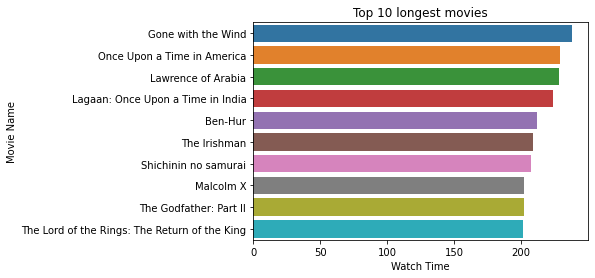

In [43]:
#top 10 longest movies
data = df[['Movie Name','Watch Time']].sort_values(by='Watch Time', ascending=False).head(10)

sns.barplot(y='Movie Name', x='Watch Time', data=data)
plt.title('Top 10 longest movies')
plt.show()

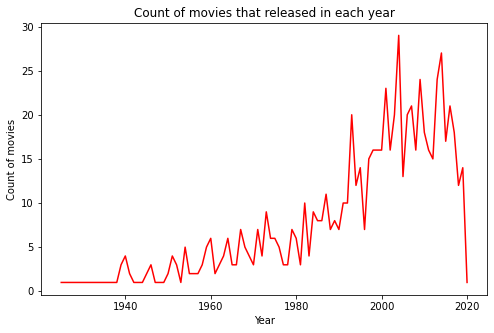

In [44]:
data = df.groupby(by=['Year of Release']).agg(movie_count = ('Movie Name', 'count'))
x = data.index
y = data.movie_count.values

plt.figure(figsize=(8, 5))
plt.plot(x, y, color='red')
plt.title('Count of movies that released in each year')
plt.xlabel('Year')
plt.ylabel('Count of movies')
plt.show()

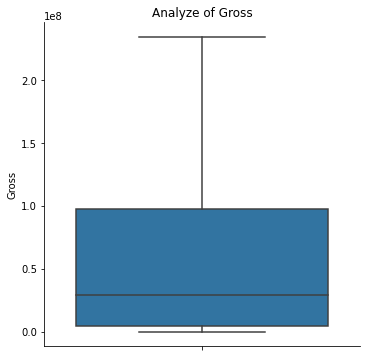

In [45]:
sns.catplot(y='Gross', data=df, kind='box', sym="")
plt.title('Analyze of Gross')
plt.show()

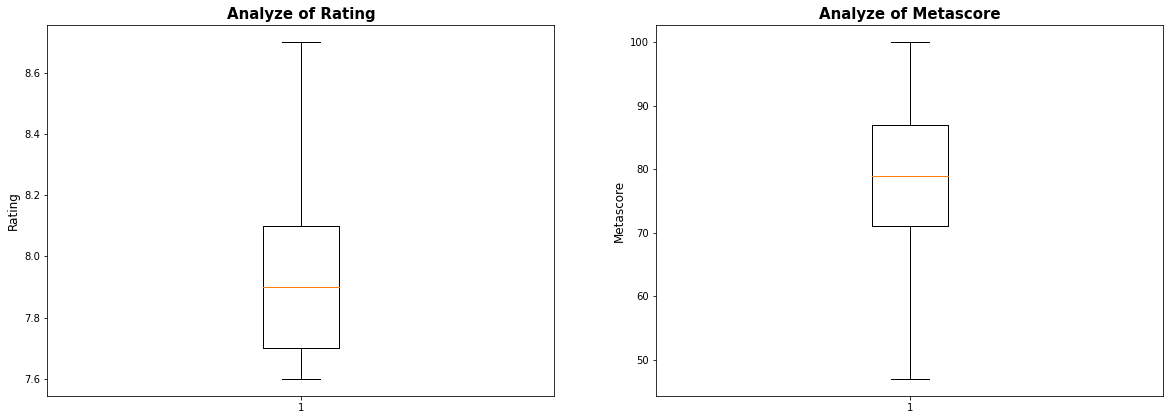

In [46]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(2, 2, 1)
ax1.boxplot(df['Rating'],0, '')
ax1.set_title("Analyze of Rating", fontweight='bold', fontsize=15)
ax1.set_ylabel("Rating", fontsize=12)

ax2 = fig.add_subplot(2, 2, 2)
ax2.boxplot(df['Metascore'],0, '')
ax2.set_title("Analyze of Metascore", fontweight='bold', fontsize=15)
ax2.set_ylabel("Metascore", fontsize=12)

plt.show()

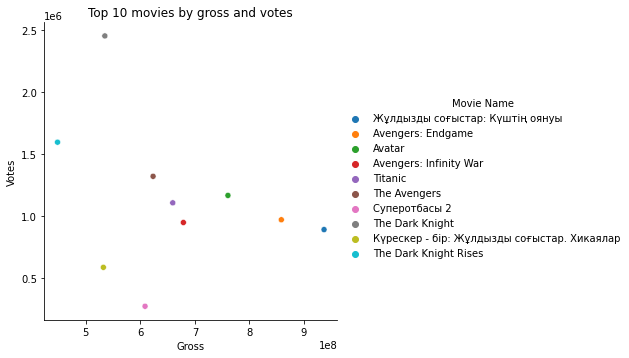

In [47]:
#top 10 movies by gross and votes
data = df.sort_values(by=['Gross','Votes'], ascending=[False,False]).head(10)

sns.relplot(x='Gross', y='Votes', data=data, kind='scatter', hue='Movie Name')
plt.title('Top 10 movies by gross and votes')
plt.show()